<a href="https://colab.research.google.com/github/M-McKegney/ET5003_SEM1_2021-2/blob/MMcKegneyKaggleET5003/ET5003_KaggleCompetition_MichaelMcKegney_20149743.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Name: Michael McKegney

# Student ID: 20149743

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [220]:
#@title Current Date
Today = '2021-10-19' #@param {type:"date"}


In [221]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "8" #@param {type:"string"}
Student_IDandName = "20149743	Michael McKegney" #@param {type:"string"}
Student_IDandName = "20197772	Barry Lawton" #@param {type:"string"}
Student_IDandName = "20179766	Olga Minguett" #@param {type:"string"}
Student_IDandName = "20179782	Timothy Hrisikos" #@param {type:"string"}
Student_IDandName = "20174578	Niall Smith" #@param {type:"string"}
#@markdown ---

In [222]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# **INTRODUCTION**

For the Kaggle competition (Etivity 3) three approaches are used to try aid with predicting house price.

*   NLP (Natural Language Processing)
*   Piecewise Regression
*   Bayesian Neural Networks

As part of the NLP approach, sklearn's MLPRegressor was used to help check predictions on the validation set. The test set was used here to make an initial prediction of house price to submit to the Kaggle competition.

For the Piecewise Regression and Bayesian Neural Network approaches, I split the training data into a train and validation set to try assess out of sample performance.


***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [223]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [224]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [226]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [227]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [228]:
!pip install gpy

In [229]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [230]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# **DATASET**

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Read in the dataset

The data is relation to the research paper by Ahtesham *et al*. (2020).

**Be careful with the 'Path' location shown below i.e. make sure it is pointing to where you store the data for the Kaggle competition!**

The following code is being used to determine if a Jupyter Notebook or Google Colab environment is being used to load the dataset.

The development work for this Kaggle Competition/Etivity was done in Google Colab.

There are 2 files to account for:

*   HousePrice_Train.csv

*   HousePrice_Test.csv

In [231]:
# Checking if you are using Google Colab.

RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # paste the path here, keep quotation marks and the trailing slash
    Path = '/content/drive/MyDrive/UL_Colab_Files/ET5003/Etivity 3 Kaggle Competition/'
    
else:
    
    Path = './KaggleCompetitionET5003/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read in each ".csv" file into a Pandas dataframe and print the shape of the data.

In [232]:
# Training Dataset: 
training_file = Path + 'HousePrice_Train.csv'
dftrain = pd.read_csv(training_file)
print('House train data shape: ', dftrain.shape)

# Test Dataset:
testing_file = Path + 'HousePrice_Test.csv'
dftest = pd.read_csv(testing_file)
print('House test data shape: ', dftest.shape)


House train data shape:  (1638, 14)
House test data shape:  (702, 13)


# Pre-processing

## Training & Test Data

### Train dataset

Check the initial rows and review some basic statistics.

In [233]:
# Show first data frame rows.
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [234]:
# Generate descriptive statistics.
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


As there is 1638 unique values for both attributes '**Index**' and '**ID**', these features are not adding any useful information so will be dropped.

In [235]:
print('Number of unique values for Index attribute: ', len(dftrain['Index'].unique()))

print('Number of unique values for ID attribute: ', len(dftrain['ID'].unique()))

dftrain.drop(columns=['Index', 'ID'], inplace=True)

Number of unique values for Index attribute:  1638
Number of unique values for ID attribute:  1638


Assess count of each feature alongside the data type i.e. whether it is numeric or categorical.

In [236]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       1638 non-null   object 
 1   Num_Bathrooms  1638 non-null   int64  
 2   Num_Beds       1638 non-null   int64  
 3   BER_class      1387 non-null   object 
 4   Description    1638 non-null   object 
 5   Services       577 non-null    object 
 6   Features       1638 non-null   object 
 7   Latitude       1638 non-null   float64
 8   Longitude      1638 non-null   float64
 9   Type           1638 non-null   object 
 10  Surface        1638 non-null   float64
 11  Price          1638 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 153.7+ KB


Check each column in the dataframe how many null/NaN instances there are.

In [237]:
dftrain.isna().sum()

Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

The attribute '**Services**' can be seen to have 1061 out of 1638 samples with a NaN/Null result. That accounts for nearly 65% of all data for that column. This attribute/feature will be dropped.

In [238]:
dftrain.drop(columns=['Services'], inplace=True)

The attribute '**BER_class**' has 251 instances of NaN/Null values but there are a variety of values it can take on so it will be maintained and instead the NaN/Null instances will be removed.

In [239]:
print('Number of unique values for BER_class attribute: ', len(dftrain['BER_class'].unique()))

Number of unique values for BER_class attribute:  17


Drop all rows with NaN present as the sample/observation is incomplete and may be misleading.

In [240]:
dftrain.dropna(inplace=True)

dftrain.shape

(1387, 11)

Remove samples where there are 0 bathrooms and 0 bedrooms if there are any.

In [241]:
dftrain.drop(dftrain[dftrain.Num_Beds == 0].index, inplace=True)

dftrain.drop(dftrain[dftrain.Num_Bathrooms == 0].index, inplace=True)

dftrain.shape

(1387, 11)

Check what features remain.

In [242]:
dftrain.head()

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
0,Ongar,2,2,C3,DNG are delighted to present to the market no....,None,53.396659,-6.438791,apartment,67.00,195000
1,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [243]:
dftrain['Location'].value_counts()

Castleknock      53
Rathfarnham      44
Lucan            41
Malahide         40
Blackrock        38
                 ..
Garristown        1
Loughlinstown     1
Smithfield        1
Oldbawn           1
Windy Arbour      1
Name: Location, Length: 137, dtype: int64

In [244]:
temporary_series = dftrain['Location'].value_counts()

temporary_series.values

array([53, 44, 41, 40, 38, 29, 28, 28, 27, 27, 25, 25, 25, 24, 24, 24, 23,
       22, 21, 21, 21, 21, 20, 20, 20, 17, 17, 16, 15, 15, 15, 15, 14, 14,
       14, 14, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10,
        9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,
        7,  6,  6,  6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1])

In [245]:
dftrain['BER_class'].value_counts()

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [246]:
dftrain['Type'].value_counts()

semi-detached     399
apartment         368
terraced          235
detached          204
end-of-terrace     98
bungalow           41
duplex             26
townhouse          14
studio              1
site                1
Name: Type, dtype: int64

For the categorical features '**Location**', '**BER_class**' and '**Type**' a mapping approach will be taken to convert these to numerical features going forward.


The approach shown below was adapted from datacamp.com by Pathak (2020) which displays a very helpful way of mapping categorical features to numerical features without having to explicitly state the mapping yourself.


Convert each categorical variable in turn and update dataframe.

In [247]:
labels = dftrain['Location'].astype('category').cat.categories.tolist()

replace_map_comp_1 = {'Location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp_1)

dftrain.replace(replace_map_comp_1, inplace=True)

{'Location': {'Adamstown': 1, 'Ard Na Greine': 2, 'Artane': 3, 'Ashtown': 4, 'Balbriggan': 5, 'Baldoyle': 6, 'Balgriffin': 7, 'Ballinteer': 8, 'Ballsbridge': 9, 'Ballybough': 10, 'Ballyboughal': 11, 'Ballybrack': 12, 'Ballycullen': 13, 'Ballyfermot': 14, 'Ballymun': 15, 'Balrothery': 16, 'Beaumont': 17, 'Blackrock': 18, 'Blanchardstown': 19, 'Bluebell': 20, 'Booterstown': 21, 'Cabinteely': 22, 'Cabra': 23, 'Carrickmines': 24, 'Castleknock': 25, 'Chapelizod': 26, 'Christchurch': 27, 'Churchtown': 28, 'Citywest': 29, 'Clarehall': 30, 'Clondalkin': 31, 'Clonee': 32, 'Clongriffin': 33, 'Clonshaugh': 34, 'Clonsilla': 35, 'Clonskeagh': 36, 'Clontarf': 37, 'Coolock': 38, 'Crumlin': 39, 'Dalkey': 40, 'Darndale': 41, 'Donabate': 42, 'Donaghmede': 43, 'Donnybrook': 44, 'Donnycarney': 45, 'Drimnagh': 46, 'Drumcondra': 47, 'Dublin 1': 48, 'Dublin 2': 49, 'Dublin 4': 50, 'Dublin 7': 51, 'Dublin 8': 52, 'Dun Laoghaire': 53, 'Dundrum': 54, 'East Wall': 55, 'Fairview': 56, 'Finglas': 57, 'Firhouse': 5

In [248]:
labels = dftrain['BER_class'].astype('category').cat.categories.tolist()

replace_map_comp_2 = {'BER_class' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp_2)

dftrain.replace(replace_map_comp_2, inplace=True)

{'BER_class': {'A1': 1, 'A2': 2, 'A3': 3, 'B1': 4, 'B2': 5, 'B3': 6, 'C1': 7, 'C2': 8, 'C3': 9, 'D1': 10, 'D2': 11, 'E1': 12, 'E2': 13, 'F': 14, 'G': 15, 'SINo666of2006exempt': 16}}


In [249]:
labels = dftrain['Type'].astype('category').cat.categories.tolist()

replace_map_comp_3 = {'Type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp_3)

dftrain.replace(replace_map_comp_3, inplace=True)

{'Type': {'apartment': 1, 'bungalow': 2, 'detached': 3, 'duplex': 4, 'end-of-terrace': 5, 'semi-detached': 6, 'site': 7, 'studio': 8, 'terraced': 9, 'townhouse': 10}}


In [250]:
dftrain.head()

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
0,98,2,2,9,DNG are delighted to present to the market no....,None,53.396659,-6.438791,1,67.00,195000
1,96,1,2,10,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,9,95.97,425000
2,124,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,6,107.00,535000
3,22,1,3,12,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,3,81.00,499000
4,85,3,4,10,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,3,153.00,510000


In [251]:
dftrain.shape

(1387, 11)

Combine attributes '**Description**' and '**Features**' so the NLP actions/steps will apply to both. Drop those old features and just retain the combined new attribute '**Information**'.

In [252]:
dftrain.shape

(1387, 11)

In [253]:
dftrain['Description'][0]

'DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround 

In [254]:
dftrain['Features'][0]

'None'

In [255]:
dftrain['Information'] = dftrain['Description'] + dftrain['Features']

dftrain.drop(columns=['Description', 'Features'], inplace=True)

dftrain.shape

(1387, 10)

In [256]:
dftrain

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Information
0,98,2,2,9,53.396659,-6.438791,1,67.00,195000,DNG are delighted to present to the market no....
1,96,1,2,10,53.357129,-6.239779,9,95.97,425000,13 Northbrook Terrace is a charming red brick ...
2,124,3,3,3,53.266468,-6.222771,6,107.00,535000,"Welcome to No. 6 Cotter Close, an immaculately..."
3,22,1,3,12,53.261600,-6.166738,3,81.00,499000,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...
4,85,3,4,10,53.550731,-6.121415,3,153.00,510000,'Four Seasons' comes to the market as a wonder...
...,...,...,...,...,...,...,...,...,...,...
1633,18,1,2,8,53.292767,-6.166668,2,64.00,500000,Built in c.1930 38 Stradbrook Road is a deligh...
1634,18,3,5,7,53.284975,-6.178685,3,175.96,795000,An impressive three-story family home superbly...
1635,84,2,3,3,53.351667,-6.435278,6,98.00,340000,DNG Lucan's leading estate agents are delighte...
1636,119,8,8,11,53.328997,-6.221030,3,507.00,2500000,Holyrood Castle is a most distinctive 19th cen...


Check boxplots of each feature to assess if there are outliers present.

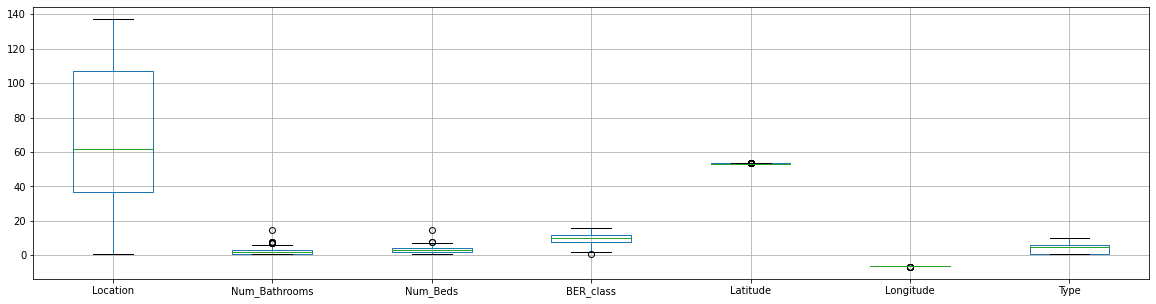

In [257]:
dftrain.loc[:,'Location':'Type'].boxplot(figsize=(20,5))
plt.show()

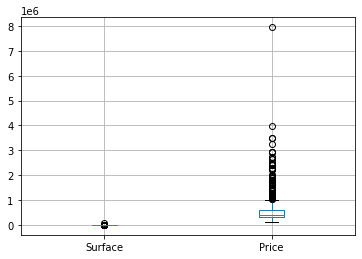

In [258]:
dftrain.boxplot(column=['Surface', 'Price'])
plt.show()

In [259]:
dftrain.shape

(1387, 10)

In [260]:
dftrain.drop(columns=['Information'])

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price
0,98,2,2,9,53.396659,-6.438791,1,67.00,195000
1,96,1,2,10,53.357129,-6.239779,9,95.97,425000
2,124,3,3,3,53.266468,-6.222771,6,107.00,535000
3,22,1,3,12,53.261600,-6.166738,3,81.00,499000
4,85,3,4,10,53.550731,-6.121415,3,153.00,510000
...,...,...,...,...,...,...,...,...,...
1633,18,1,2,8,53.292767,-6.166668,2,64.00,500000
1634,18,3,5,7,53.284975,-6.178685,3,175.96,795000
1635,84,2,3,3,53.351667,-6.435278,6,98.00,340000
1636,119,8,8,11,53.328997,-6.221030,3,507.00,2500000


In [261]:
dftrain

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Information
0,98,2,2,9,53.396659,-6.438791,1,67.00,195000,DNG are delighted to present to the market no....
1,96,1,2,10,53.357129,-6.239779,9,95.97,425000,13 Northbrook Terrace is a charming red brick ...
2,124,3,3,3,53.266468,-6.222771,6,107.00,535000,"Welcome to No. 6 Cotter Close, an immaculately..."
3,22,1,3,12,53.261600,-6.166738,3,81.00,499000,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...
4,85,3,4,10,53.550731,-6.121415,3,153.00,510000,'Four Seasons' comes to the market as a wonder...
...,...,...,...,...,...,...,...,...,...,...
1633,18,1,2,8,53.292767,-6.166668,2,64.00,500000,Built in c.1930 38 Stradbrook Road is a deligh...
1634,18,3,5,7,53.284975,-6.178685,3,175.96,795000,An impressive three-story family home superbly...
1635,84,2,3,3,53.351667,-6.435278,6,98.00,340000,DNG Lucan's leading estate agents are delighte...
1636,119,8,8,11,53.328997,-6.221030,3,507.00,2500000,Holyrood Castle is a most distinctive 19th cen...



Cycle through each numerical feature in the training data set and remove data points that are deemed outliers i.e. data points that fall outside the IQR (Interquartile Range). I adapted code by Brownlee (2018) to help assess outliers in the data.

In [262]:
# Adapted from https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

for each_feature in dftrain.drop(columns=['Information']):

  data = dftrain[each_feature]

  # Calculate IQR (Interquartile Range).
  q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
  iqr = q75 - q25

  # Calculate the outlier cut-off.
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off

  # Identify outliers.

  index_list = []
  outliers_list = []

  index_counter = -1

  for each_element in data:

    index_counter += 1

    if each_element < lower or each_element > upper:

      outliers_list.append(each_element)
      
      index_list.append(index_counter)

  # print(each_feature)
  # print(len(data))
  # print(outliers_list)
  # print(index_list)
  print('Number of outliers in ', each_feature, ': ', len(index_list))
  # print('\n')

  dftrain.drop(dftrain[dftrain[each_feature].isin(outliers_list)].index, inplace=True)
  #dftrain.shape 


Number of outliers in  Location :  0
Number of outliers in  Num_Bathrooms :  9
Number of outliers in  Num_Beds :  0
Number of outliers in  BER_class :  1
Number of outliers in  Latitude :  76
Number of outliers in  Longitude :  5
Number of outliers in  Type :  0
Number of outliers in  Surface :  82
Number of outliers in  Price :  49


New shape of the training data after removing outliers.

In [263]:
dftrain.shape

(1165, 10)

### Test dataset

In [264]:
# show first data frame rows 
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [265]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [266]:
dftest.shape

(702, 13)

As there is 702 unique values for both attributes '**Index**' and '**ID**', these features are not adding any useful information so will be dropped.



**Can leave Index/Id in initially for Kaggle submission purposes only. It states on 'Id' on Kaggle but it is 'Index' that is required.**

In [267]:
print('Number of unique values for Index attribute: ', len(dftest['Index'].unique()))

#print('Number of unique values for ID attribute: ', len(dftest['ID'].unique()))

#dftest.drop(columns=['Index', 'ID'], inplace=True)

dftest.drop(columns=['ID'], inplace=True)

Number of unique values for Index attribute:  702


Assess count of each feature alongside the data type i.e. whether it is numeric or categorical.

In [268]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          702 non-null    int64  
 1   Location       702 non-null    object 
 2   Num_Bathrooms  702 non-null    int64  
 3   Num_Beds       702 non-null    int64  
 4   BER_class      594 non-null    object 
 5   Description    702 non-null    object 
 6   Services       246 non-null    object 
 7   Features       702 non-null    object 
 8   Latitude       702 non-null    float64
 9   Longitude      702 non-null    float64
 10  Type           702 non-null    object 
 11  Surface        702 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 65.9+ KB


Check each column in the dataframe how many null/NaN instances there are.

In [269]:
dftest.isna().sum()

Index              0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        108
Description        0
Services         456
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
dtype: int64

The attribute '**Services**' can be seen to have 456 out of 702 samples with 
a NaN/Null result. That accounts for nearly 65% of all data for that column. This attribute/feature will be dropped.

In [270]:
dftest.drop(columns=['Services'], inplace=True)

The attribute '**BER_class**' will be retained as with the training data.

In [271]:
print('Number of unique values for BER_class attribute: ', len(dftest['BER_class'].unique()))

Number of unique values for BER_class attribute:  16


Drop all rows with NaN present as the sample/observation is incomplete and may be misleading.

In [272]:
dftest.dropna(inplace=True)

dftest.shape

(594, 11)

Remove samples where there are 0 bathrooms and 0 bedrooms if there are any.

In [273]:
dftest.drop(dftest[dftest.Num_Beds == 0].index, inplace=True)

dftest.drop(dftest[dftest.Num_Bathrooms == 0].index, inplace=True)

dftest.shape

(594, 11)

Check what features remain.

In [274]:
dftest.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface
0,1639,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [275]:
dftest['Location'].value_counts()

Rathfarnham     28
Clontarf        17
Malahide        17
Dublin 8        16
Drumcondra      15
                ..
Balrothery       1
Carrickmines     1
Newcastle        1
Kilternan        1
Kiltipper        1
Name: Location, Length: 121, dtype: int64

In [276]:
temporary_series = dftest['Location'].value_counts()

temporary_series.values

array([28, 17, 17, 16, 15, 15, 14, 14, 13, 13, 13, 12, 11, 10, 10, 10,  9,
        9,  9,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1])

In [277]:
dftest['BER_class'].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
SINo666of2006exempt     8
A2                      8
B1                      7
Name: BER_class, dtype: int64

In [278]:
dftest['Type'].value_counts()

apartment         160
semi-detached     154
terraced          104
detached           89
end-of-terrace     55
bungalow           15
duplex             11
townhouse           4
site                2
Name: Type, dtype: int64

For the categorical features '**Location**', '**BER_class**' and '**Type**' a mapping approach will be taken to convert these to numerical features going forward.


The approach shown below was adapted from datacamp.com by Pathak (2020) which displays a very helpful way of mapping categorical features to numerical features without having to explicitly state the mapping yourself.


Convert each categorical variable in turn and update dataframe.

In [279]:
labels = dftest['Location'].astype('category').cat.categories.tolist()

replace_map_comp_1 = {'Location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp_1)

dftest.replace(replace_map_comp_1, inplace=True)

{'Location': {'Artane': 1, 'Ashtown': 2, 'Balbriggan': 3, 'Baldoyle': 4, 'Balgriffin': 5, 'Ballinteer': 6, 'Ballsbridge': 7, 'Ballybrack': 8, 'Ballycullen': 9, 'Ballyfermot': 10, 'Ballymun': 11, 'Balrothery': 12, 'Beaumont': 13, 'Blackrock': 14, 'Blanchardstown': 15, 'Booterstown': 16, 'Brittas': 17, 'Cabinteely': 18, 'Cabra': 19, 'Carrickmines': 20, 'Castleknock': 21, 'Chapelizod': 22, 'Christchurch': 23, 'Churchtown': 24, 'Citywest': 25, 'Clarehall': 26, 'Clondalkin': 27, 'Clonee': 28, 'Clongriffin': 29, 'Clonshaugh': 30, 'Clonsilla': 31, 'Clonskeagh': 32, 'Clontarf': 33, 'Coolock': 34, 'Crumlin': 35, 'Dalkey': 36, 'Dartry': 37, 'Donabate': 38, 'Donnybrook': 39, 'Donnycarney': 40, 'Drimnagh': 41, 'Drumcondra': 42, 'Dublin 1': 43, 'Dublin 2': 44, 'Dublin 4': 45, 'Dublin 7': 46, 'Dublin 8': 47, 'Dun Laoghaire': 48, 'Dundrum': 49, 'East Wall': 50, 'Edenmore': 51, 'Finglas': 52, 'Foxrock': 53, 'Glasnevin': 54, 'Glenageary': 55, 'Goatstown': 56, 'Grand Canal Dock': 57, 'Greenhills': 58, "

In [280]:
labels = dftest['BER_class'].astype('category').cat.categories.tolist()

replace_map_comp_2 = {'BER_class' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp_2)

dftest.replace(replace_map_comp_2, inplace=True)

{'BER_class': {'A2': 1, 'A3': 2, 'B1': 3, 'B2': 4, 'B3': 5, 'C1': 6, 'C2': 7, 'C3': 8, 'D1': 9, 'D2': 10, 'E1': 11, 'E2': 12, 'F': 13, 'G': 14, 'SINo666of2006exempt': 15}}


In [281]:
labels = dftest['Type'].astype('category').cat.categories.tolist()

replace_map_comp_3 = {'Type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp_3)

dftest.replace(replace_map_comp_3, inplace=True)

{'Type': {'apartment': 1, 'bungalow': 2, 'detached': 3, 'duplex': 4, 'end-of-terrace': 5, 'semi-detached': 6, 'site': 7, 'terraced': 8, 'townhouse': 9}}


In [282]:
dftest.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface
0,1639,77,2,2,7,OMD Estate Agents are delighted to present thi...,Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,9,65.0
1,1640,54,2,5,11,Welcome to Saint Anthony No.214 Glasnevin Aven...,Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,6,142.0
2,1641,36,1,2,14,"Located in this ever popular road, on grounds ...",2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,3,80.0
3,1642,92,4,4,1,DNG are delighted to represent the sale of thi...,Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,3,209.0
4,1643,35,2,3,13,A unique opportunity to acquire this red brick...,Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,5,108.0


In [283]:
dftest.shape

(594, 11)

Combine attributes '**Description**' and '**Features**' so the NLP actions/steps will apply to both. Drop those old features and just retain the combined new attribute '**Information**'.

In [284]:
dftest.shape

(594, 11)

In [285]:
dftest['Description'][0]

'OMD Estate Agents are delighted to present this 2 bed townhouse situated in this well sought after location. The property is presented in immaculate condition and is conveniently located within a short stroll of Milltown, Ranelagh and Donnybrook villages. \r\nThe accommodation comprises of 2 double bedrooms, both rooms with built in wardrobes and family bathroom. Downstairs consists of good sized living area with stove fire, under stairs storage room, kitchen/ dining room with all integrated goods and w.c. There is a sunny paved terrace to the rear.\n\r\nIt has O.F.C.H, PVC double glazing throughout, designated parking space. Local amenities include Luas, bus routes, shops, Wilde and Green, David Lloyd Riverview gym, restaurants, bars and U.C.D.\n\r\nLiving Room 4.46m x 3.56m\r\nKitchen 4.00m x 3.65m\r\nW.c 1.65m x 1.90m\r\nBed 1) 3.11m x 3.53m\r\nBed 2) 2.63m x 3.54m\r\nBathroom 2.68m x 1.43m\r\nLanding 2.57m x .82m'

In [286]:
dftest['Features'][0]

'Designated parking spaces\nPresented in pristine condition\nPVC double glazing throughout\nO.F.C.H\nSunny terrace\nManagement fees €1,300 per annum.\n'

In [287]:
dftest['Information'] = dftest['Description'] + dftest['Features']

dftest.drop(columns=['Description', 'Features'], inplace=True)

dftest.shape

(594, 10)

In [288]:
dftest

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Information
0,1639,77,2,2,7,53.316269,-6.243391,9,65.00,OMD Estate Agents are delighted to present thi...
1,1640,54,2,5,11,53.390769,-6.281936,6,142.00,Welcome to Saint Anthony No.214 Glasnevin Aven...
2,1641,36,1,2,14,53.272486,-6.108675,3,80.00,"Located in this ever popular road, on grounds ..."
3,1642,92,4,4,1,53.376932,-6.185334,3,209.00,DNG are delighted to represent the sale of thi...
4,1643,35,2,3,13,53.327208,-6.308938,5,108.00,A unique opportunity to acquire this red brick...
...,...,...,...,...,...,...,...,...,...,...
696,2335,19,1,3,7,53.370882,-6.298255,8,80.62,The Property Shop are delighted to being this ...
697,2336,66,1,1,14,53.343377,-6.296654,1,40.00,Sherry FitzGerald is delighted to present 56 B...
698,2337,112,1,2,10,53.351074,-6.285557,8,57.00,26 Viking Road is a well presented and moderni...
699,2338,18,1,3,9,53.261710,-6.164979,6,93.00,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....


Check boxplots of each feature to assess if there are outliers present.

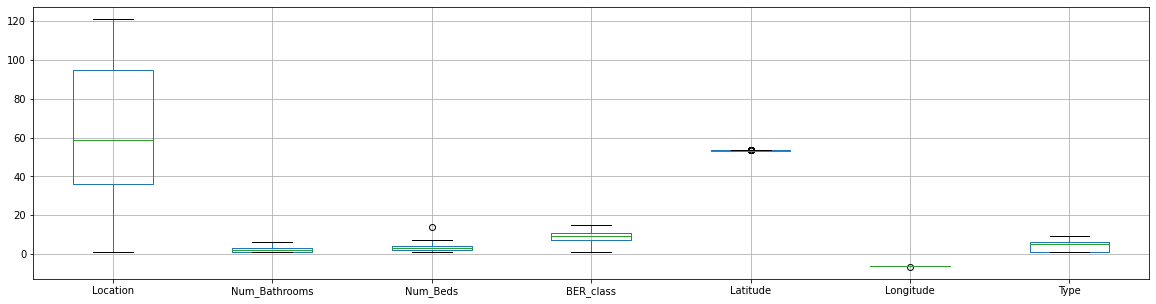

In [289]:
dftest.loc[:,'Location':'Type'].boxplot(figsize=(20,5))
plt.show()

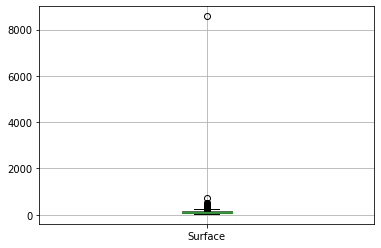

In [290]:
dftest.boxplot(column=['Surface'])
plt.show()

In [291]:
dftest.shape

(594, 10)

In [292]:
dftest.drop(columns=['Information'])

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
0,1639,77,2,2,7,53.316269,-6.243391,9,65.00
1,1640,54,2,5,11,53.390769,-6.281936,6,142.00
2,1641,36,1,2,14,53.272486,-6.108675,3,80.00
3,1642,92,4,4,1,53.376932,-6.185334,3,209.00
4,1643,35,2,3,13,53.327208,-6.308938,5,108.00
...,...,...,...,...,...,...,...,...,...
696,2335,19,1,3,7,53.370882,-6.298255,8,80.62
697,2336,66,1,1,14,53.343377,-6.296654,1,40.00
698,2337,112,1,2,10,53.351074,-6.285557,8,57.00
699,2338,18,1,3,9,53.261710,-6.164979,6,93.00


In [293]:
dftest

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Information
0,1639,77,2,2,7,53.316269,-6.243391,9,65.00,OMD Estate Agents are delighted to present thi...
1,1640,54,2,5,11,53.390769,-6.281936,6,142.00,Welcome to Saint Anthony No.214 Glasnevin Aven...
2,1641,36,1,2,14,53.272486,-6.108675,3,80.00,"Located in this ever popular road, on grounds ..."
3,1642,92,4,4,1,53.376932,-6.185334,3,209.00,DNG are delighted to represent the sale of thi...
4,1643,35,2,3,13,53.327208,-6.308938,5,108.00,A unique opportunity to acquire this red brick...
...,...,...,...,...,...,...,...,...,...,...
696,2335,19,1,3,7,53.370882,-6.298255,8,80.62,The Property Shop are delighted to being this ...
697,2336,66,1,1,14,53.343377,-6.296654,1,40.00,Sherry FitzGerald is delighted to present 56 B...
698,2337,112,1,2,10,53.351074,-6.285557,8,57.00,26 Viking Road is a well presented and moderni...
699,2338,18,1,3,9,53.261710,-6.164979,6,93.00,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....



Cycle through each numerical feature in the test data set and remove data points that are deemed outliers i.e. data points that fall outside the IQR (Interquartile Range). I adapted code by Brownlee (2018) to help assess outliers in the data.

In [294]:
# Adapted from https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

for each_feature in dftest.drop(columns=['Index', 'Information']):

  data = dftest[each_feature]

  # Calculate IQR (Interquartile Range).
  q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
  iqr = q75 - q25

  # Calculate the outlier cut-off.
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off

  # Identify outliers.

  index_list = []
  outliers_list = []

  index_counter = -1

  for each_element in data:

    index_counter += 1

    if each_element < lower or each_element > upper:

      outliers_list.append(each_element)
      
      index_list.append(index_counter)

  # print(each_feature)
  # print(len(data))
  # print(outliers_list)
  # print(index_list)
  print('Number of outliers in ', each_feature, ': ', len(index_list))
  # print('\n')

  dftest.drop(dftest[dftest[each_feature].isin(outliers_list)].index, inplace=True)
  #dftest.shape 


Number of outliers in  Location :  0
Number of outliers in  Num_Bathrooms :  0
Number of outliers in  Num_Beds :  1
Number of outliers in  BER_class :  0
Number of outliers in  Latitude :  30
Number of outliers in  Longitude :  1
Number of outliers in  Type :  0
Number of outliers in  Surface :  34


New shape of the training data after removing outliers.

In [295]:
dftest.shape

(528, 10)

# **METHOD**

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

In [296]:
dftrain.shape

(1165, 10)

In [297]:
dftrain['Information'][0]

'DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround 

In [298]:
info_list = dftrain['Information'].tolist()
info_list[0:9]

['DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround

In [299]:
new_df = pd.DataFrame({'message':info_list})

In [300]:
# removing everything except alphabets
new_df['clean_message'] = new_df['message'].str.replace("[^a-zA-Z#]", " ")

In [301]:
# removing short words
short_word = 4
new_df['clean_message'] = new_df['clean_message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

In [302]:
# make all text lowercase
new_df['clean_message'] = new_df['clean_message'].apply(lambda x: x.lower())

In [303]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

swords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [304]:
# tokenization
tokenized_doc = new_df['clean_message'].apply(lambda x: x.split())

In [305]:
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in swords])

In [306]:
# de-tokenization
detokenized_doc = []
for i in range(len(new_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

In [307]:
new_df['clean_message'] = detokenized_doc

In [308]:
new_df.head()

,message,clean_message
0,DNG are delighted to present to the market no....,delighted present market chipping bedroom apar...
1,13 Northbrook Terrace is a charming red brick ...,northbrook terrace charming brick period seclu...
2,"Welcome to No. 6 Cotter Close, an immaculately...",welcome cotter close immaculately presented th...
3,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,welcome sycamore enjoying premier address smal...
4,Property Team Lappin Estates take great pleasu...,property lappin estates great pleasure present...


**[TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)**

Convert a collection of raw documents to a matrix of TF-IDF features.

In [309]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 10, max_df=0.5, smooth_idf=True)

# vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)

print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=10,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [310]:
X_nlp_sparse = vectorizer.fit_transform(new_df['clean_message'])
X_nlp_sparse.shape

(1165, 10)

In [311]:
type(X_nlp_sparse)

scipy.sparse.csr.csr_matrix

In [312]:
nlp_train_vocab = vectorizer.vocabulary_

nlp_train_vocab

{'apartment': 0,
 'bright': 1,
 'development': 2,
 'doors': 3,
 'facing': 4,
 'flooring': 5,
 'fully': 6,
 'space': 7,
 'street': 8,
 'window': 9}

In [313]:
y_nlp = dftrain['Price']
y_nlp.shape

(1165,)

In [314]:
type(X_nlp_sparse)

# plt.scatter(X[0], X[1], 'ro')
# plt.show()

scipy.sparse.csr.csr_matrix

In [315]:
###### my code

X_nlp = X_nlp_sparse.todense()

type(X_nlp)

numpy.matrix

In [316]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_bal, y_bal, test_size = 0.20, random_state = 0)


from sklearn.model_selection import train_test_split
X_nlp_train, X_nlp_val, y_nlp_train, y_nlp_val = train_test_split(X_nlp, y_nlp, test_size = 0.20, random_state = 0)


In [317]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(25, 25, 25),random_state=1, max_iter=500).fit(X_nlp_train, y_nlp_train)

y_nlp_val_pred = regr.predict(X_nlp_val)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

In [318]:
from sklearn.metrics import mean_squared_log_error

# squaredbool, default=True 
# If True returns MSLE (mean squared log error) value. 
# If False returns RMSLE (root mean squared log error) value.

# mean_squared_log_error(y_true, y_pred)

#####RMSLE_NLP = mean_squared_log_error(y_nlp_val, y_nlp_val_pred, squared=False) #????????????????

RMSLE_NLP = mean_squared_log_error(y_nlp_val, y_nlp_val_pred)
RMSLE_NLP
#0.14

np.sqrt(mean_squared_log_error( y_nlp_val, y_nlp_val_pred ))


0.3829047277609516

In [319]:
######### my code

y_nlp_val.shape

y_nlp_val_pred.shape

type(y_nlp_val)

y_nlp_val_numpy_array = y_nlp_val.to_numpy()

# type(y_nlp_val_pred)

np.sqrt(mean_squared_log_error( y_nlp_val_numpy_array, y_nlp_val_pred ))

0.3829047277609516

In [320]:
# y_nlp_val_numpy_array
# y_nlp_val_pred

### Test set usage

In [321]:
dftest.shape

(528, 10)

In [322]:
dftest

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Information
0,1639,77,2,2,7,53.316269,-6.243391,9,65.00,OMD Estate Agents are delighted to present thi...
1,1640,54,2,5,11,53.390769,-6.281936,6,142.00,Welcome to Saint Anthony No.214 Glasnevin Aven...
2,1641,36,1,2,14,53.272486,-6.108675,3,80.00,"Located in this ever popular road, on grounds ..."
3,1642,92,4,4,1,53.376932,-6.185334,3,209.00,DNG are delighted to represent the sale of thi...
4,1643,35,2,3,13,53.327208,-6.308938,5,108.00,A unique opportunity to acquire this red brick...
...,...,...,...,...,...,...,...,...,...,...
696,2335,19,1,3,7,53.370882,-6.298255,8,80.62,The Property Shop are delighted to being this ...
697,2336,66,1,1,14,53.343377,-6.296654,1,40.00,Sherry FitzGerald is delighted to present 56 B...
698,2337,112,1,2,10,53.351074,-6.285557,8,57.00,26 Viking Road is a well presented and moderni...
699,2338,18,1,3,9,53.261710,-6.164979,6,93.00,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....


In [323]:
dftest.reset_index(inplace=True)

dftest

,index,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Information
0,0,1639,77,2,2,7,53.316269,-6.243391,9,65.00,OMD Estate Agents are delighted to present thi...
1,1,1640,54,2,5,11,53.390769,-6.281936,6,142.00,Welcome to Saint Anthony No.214 Glasnevin Aven...
2,2,1641,36,1,2,14,53.272486,-6.108675,3,80.00,"Located in this ever popular road, on grounds ..."
3,3,1642,92,4,4,1,53.376932,-6.185334,3,209.00,DNG are delighted to represent the sale of thi...
4,4,1643,35,2,3,13,53.327208,-6.308938,5,108.00,A unique opportunity to acquire this red brick...
...,...,...,...,...,...,...,...,...,...,...,...
523,696,2335,19,1,3,7,53.370882,-6.298255,8,80.62,The Property Shop are delighted to being this ...
524,697,2336,66,1,1,14,53.343377,-6.296654,1,40.00,Sherry FitzGerald is delighted to present 56 B...
525,698,2337,112,1,2,10,53.351074,-6.285557,8,57.00,26 Viking Road is a well presented and moderni...
526,699,2338,18,1,3,9,53.261710,-6.164979,6,93.00,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....


In [324]:
info_list = dftest['Information'].tolist()
info_list[0:9]

['OMD Estate Agents are delighted to present this 2 bed townhouse situated in this well sought after location. The property is presented in immaculate condition and is conveniently located within a short stroll of Milltown, Ranelagh and Donnybrook villages. \r\nThe accommodation comprises of 2 double bedrooms, both rooms with built in wardrobes and family bathroom. Downstairs consists of good sized living area with stove fire, under stairs storage room, kitchen/ dining room with all integrated goods and w.c. There is a sunny paved terrace to the rear.\n\r\nIt has O.F.C.H, PVC double glazing throughout, designated parking space. Local amenities include Luas, bus routes, shops, Wilde and Green, David Lloyd Riverview gym, restaurants, bars and U.C.D.\n\r\nLiving Room 4.46m x 3.56m\r\nKitchen 4.00m x 3.65m\r\nW.c 1.65m x 1.90m\r\nBed 1) 3.11m x 3.53m\r\nBed 2) 2.63m x 3.54m\r\nBathroom 2.68m x 1.43m\r\nLanding 2.57m x .82mDesignated parking spaces\nPresented in pristine condition\nPVC doub

In [325]:
new_df = pd.DataFrame({'message':info_list})

In [326]:
# removing everything except alphabets
new_df['clean_message'] = new_df['message'].str.replace("[^a-zA-Z#]", " ")

In [327]:
# removing short words
short_word = 4
new_df['clean_message'] = new_df['clean_message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

In [328]:
# make all text lowercase
new_df['clean_message'] = new_df['clean_message'].apply(lambda x: x.lower())

In [329]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

swords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [330]:
# tokenization
tokenized_doc = new_df['clean_message'].apply(lambda x: x.split())

In [331]:
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in swords])

In [332]:
# de-tokenization
detokenized_doc = []
for i in range(len(new_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

In [333]:
new_df['clean_message'] = detokenized_doc

In [334]:
new_df.head()

,message,clean_message
0,OMD Estate Agents are delighted to present thi...,estate agents delighted present townhouse situ...
1,Welcome to Saint Anthony No.214 Glasnevin Aven...,welcome saint anthony glasnevin avenue substan...
2,"Located in this ever popular road, on grounds ...",located popular grounds approximately killiney...
3,DNG are delighted to represent the sale of thi...,delighted represent impeccable tyler owens des...
4,A unique opportunity to acquire this red brick...,unique opportunity acquire brick bedroom prope...


**[TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)**

Convert a collection of raw documents to a matrix of TF-IDF features.

**sklearn: "Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency"**

In [335]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # vectorizer = TfidfVectorizer(stop_words='english', max_features= 50, max_df=0.5, smooth_idf=True)

# vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, vocabulary=nlp_train_vocab, max_df=0.5, smooth_idf=True)

# print(vectorizer)

**sklearn: "Transform documents to document-term matrix.
Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform)."**

In [336]:
X_nlp_sparse = vectorizer.transform(new_df['clean_message'])
X_nlp_sparse.shape

(528, 10)

In [337]:
type(X_nlp_sparse)

scipy.sparse.csr.csr_matrix

In [338]:
###### my code

X_nlp_test = X_nlp_sparse.todense()

type(X_nlp_test)

numpy.matrix

In [339]:
X_nlp_test.shape

(528, 10)

In [340]:
# from sklearn.neural_network import MLPRegressor

# regr = MLPRegressor(hidden_layer_sizes=(25, 25, 25),random_state=1, max_iter=500).fit(X_nlp_train, y_nlp_train)

y_nlp_test_pred = regr.predict(X_nlp_test)

In [341]:
type(y_nlp_test_pred)

numpy.ndarray

In [342]:
# Convert from Numpy array to Pandas DataFrame.

y_nlp_test_pred_df = pd.DataFrame(data=y_nlp_test_pred, columns=["Price"])

y_nlp_test_pred_df.shape

(528, 1)

In [343]:
y_nlp_test_pred_df.head()

,Price
0,311796.152179
1,455961.301473
2,462403.195171
3,487094.811540
4,390584.557225


In [344]:
nlp_test_ID = dftest.drop(['Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',	'Latitude',	'Longitude', 'Type', 'Surface', 'Information'], axis=1)

nlp_test_ID.head()

,index,Index
0,0,1639
1,1,1640
2,2,1641
3,3,1642
4,4,1643


In [345]:
nlp_test_ID.shape

(528, 2)

In [346]:
dftest_nlp_total = pd.concat([nlp_test_ID, y_nlp_test_pred_df], axis=1)

# dftest_nlp_total.rename(columns={"ID": "Id"}, inplace=True)
dftest_nlp_total.rename(columns={"ID": "Index"}, inplace=True)

#dftest_nlp_total.drop(columns={'index'}, inplace=True)

dftest_nlp_total.head()

,index,Index,Price
0,0,1639,311796.152179
1,1,1640,455961.301473
2,2,1641,462403.195171
3,3,1642,487094.811540
4,4,1643,390584.557225


In [347]:
dftest_nlp_total.shape

(528, 3)

In [348]:
#dftest_nlp_total.to_csv('ET5003_Kaggle_MichaelMcKegney_20149743.csv', index=False)

#dftest_nlp_total.to_csv('C:/Users/mmcke/ET5003_SEM1_2021-2/ET5003_Kaggle_MichaelMcKegney_20149743.csv', index=False)

dftest_nlp_total.to_csv('/content/drive/MyDrive/UL_Colab_Files/ET5003/Etivity 3 Kaggle Competition/ET5003_Kaggle_MichaelMcKegney_20149743.csv', index=False)

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [349]:
dftrain.head()

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Information
0,98,2,2,9,53.396659,-6.438791,1,67.00,195000,DNG are delighted to present to the market no....
1,96,1,2,10,53.357129,-6.239779,9,95.97,425000,13 Northbrook Terrace is a charming red brick ...
2,124,3,3,3,53.266468,-6.222771,6,107.00,535000,"Welcome to No. 6 Cotter Close, an immaculately..."
3,22,1,3,12,53.261600,-6.166738,3,81.00,499000,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...
5,61,1,3,12,53.380367,-6.279310,9,140.00,360000,Property Team Lappin Estates take great pleasu...


In [350]:
dftrain.shape

(1165, 10)

In [351]:
dftest.head()

,index,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Information
0,0,1639,77,2,2,7,53.316269,-6.243391,9,65.0,OMD Estate Agents are delighted to present thi...
1,1,1640,54,2,5,11,53.390769,-6.281936,6,142.0,Welcome to Saint Anthony No.214 Glasnevin Aven...
2,2,1641,36,1,2,14,53.272486,-6.108675,3,80.0,"Located in this ever popular road, on grounds ..."
3,3,1642,92,4,4,1,53.376932,-6.185334,3,209.0,DNG are delighted to represent the sale of thi...
4,4,1643,35,2,3,13,53.327208,-6.308938,5,108.0,A unique opportunity to acquire this red brick...


In [352]:
dftest.shape

(528, 11)

In [353]:
X_nlp.shape

(1165, 10)

In [354]:
type(X_nlp)

numpy.matrix

In [355]:
df_X_nlp = pd.DataFrame(data=X_nlp)

# dftest_nlp_total = pd.concat([nlp_test_ID, y_nlp_test_pred_df], axis=1)

In [356]:
df_X_nlp

,0,1,2,3,4,5,6,7,8,9
0,0.759901,0.000000,0.000000,0.000000,0.000000,0.436204,0.000000,0.414139,0.000000,0.246507
1,0.000000,0.000000,0.000000,0.256859,0.258259,0.256025,0.000000,0.850761,0.238850,0.144685
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.671497,0.217924,0.212510,0.626450,0.252984
3,0.000000,0.000000,0.000000,0.000000,0.829209,0.000000,0.400168,0.390227,0.000000,0.000000
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1160,0.279662,0.000000,0.241847,0.000000,0.485803,0.722402,0.234444,0.000000,0.224646,0.000000
1161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1163,0.000000,0.183392,0.000000,0.685321,0.000000,0.585511,0.190019,0.000000,0.091039,0.330884


In [357]:
df_X_nlp.columns=['Word0', 'Word1', 'Word2', 'Word3', 'Word4', 'Word5', \
                  'Word6', 'Word7', 'Word8', 'Word9']

In [358]:
df_X_nlp

,Word0,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9
0,0.759901,0.000000,0.000000,0.000000,0.000000,0.436204,0.000000,0.414139,0.000000,0.246507
1,0.000000,0.000000,0.000000,0.256859,0.258259,0.256025,0.000000,0.850761,0.238850,0.144685
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.671497,0.217924,0.212510,0.626450,0.252984
3,0.000000,0.000000,0.000000,0.000000,0.829209,0.000000,0.400168,0.390227,0.000000,0.000000
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1160,0.279662,0.000000,0.241847,0.000000,0.485803,0.722402,0.234444,0.000000,0.224646,0.000000
1161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1163,0.000000,0.183392,0.000000,0.685321,0.000000,0.585511,0.190019,0.000000,0.091039,0.330884


In [359]:
dftrain.reset_index(inplace=True)

In [360]:
dftrain_nlp = pd.concat([dftrain, df_X_nlp], axis=1)

In [361]:
dftrain_nlp.shape

(1165, 21)

In [362]:
dftrain_nlp.drop(['Information'], axis=1, inplace=True)

In [363]:
dftrain_nlp.head()

,index,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Word0,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9
0,0,98,2,2,9,53.396659,-6.438791,1,67.00,195000,0.759901,0.0,0.0,0.000000,0.000000,0.436204,0.000000,0.414139,0.00000,0.246507
1,1,96,1,2,10,53.357129,-6.239779,9,95.97,425000,0.000000,0.0,0.0,0.256859,0.258259,0.256025,0.000000,0.850761,0.23885,0.144685
2,2,124,3,3,3,53.266468,-6.222771,6,107.00,535000,0.000000,0.0,0.0,0.000000,0.000000,0.671497,0.217924,0.212510,0.62645,0.252984
3,3,22,1,3,12,53.261600,-6.166738,3,81.00,499000,0.000000,0.0,0.0,0.000000,0.829209,0.000000,0.400168,0.390227,0.00000,0.000000
4,5,61,1,3,12,53.380367,-6.279310,9,140.00,360000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [364]:
dftrain_nlp.shape

(1165, 20)

**Dividing dftrain_nlp into a training and validation set.**

In [365]:
df_dataset_X = dftrain_nlp.copy()
df_dataset_X.drop(columns=['index', 'Price'], inplace=True)
df_dataset_X.head()

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Word0,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9
0,98,2,2,9,53.396659,-6.438791,1,67.00,0.759901,0.0,0.0,0.000000,0.000000,0.436204,0.000000,0.414139,0.00000,0.246507
1,96,1,2,10,53.357129,-6.239779,9,95.97,0.000000,0.0,0.0,0.256859,0.258259,0.256025,0.000000,0.850761,0.23885,0.144685
2,124,3,3,3,53.266468,-6.222771,6,107.00,0.000000,0.0,0.0,0.000000,0.000000,0.671497,0.217924,0.212510,0.62645,0.252984
3,22,1,3,12,53.261600,-6.166738,3,81.00,0.000000,0.0,0.0,0.000000,0.829209,0.000000,0.400168,0.390227,0.00000,0.000000
4,61,1,3,12,53.380367,-6.279310,9,140.00,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [366]:
df_dataset_X.shape

(1165, 18)

In [367]:
df_dataset_y = dftrain_nlp.copy()
df_dataset_y.drop(columns=['index',	'Location',	'Num_Bathrooms',	'Num_Beds',\
                           'BER_class',	'Latitude',	'Longitude',	'Type',\
                           'Surface',	'Word0',	'Word1',	'Word2',	'Word3',\
                           'Word4',	'Word5',	'Word6',	'Word7',	'Word8',\
                           'Word9'], inplace=True)
df_dataset_y.head()

,Price
0,195000
1,425000
2,535000
3,499000
4,360000


In [368]:
df_dataset_y.shape

(1165, 1)

In [369]:
df_dataset_X_train, df_dataset_X_val, df_dataset_y_train, df_dataset_y_val = train_test_split(df_dataset_X, df_dataset_y, test_size = 0.20, random_state = 0)

## Full Model

Matching the validation data with the variables labelled 'test' as it allowed for easier re-use of code.

In [370]:
# train set, input columns
Xs_train = df_dataset_X_train.iloc[:,:].values
# train set, output column
ys_train = df_dataset_y_train.Price.values.reshape(-1,1)   

# test set, input columns
Xs_test = df_dataset_X_val.iloc[:,:].values 
# test set, output column
y_test = df_dataset_y_val.Price.values

In [371]:
Xs_train.shape

(932, 18)

In [372]:
ys_train.shape

(932, 1)

In [373]:
Xs_test.shape

(233, 18)

In [374]:
y_test.shape

(233,)

In [375]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

#Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
Xss_train = Xs_train.copy()
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

#Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xss_test = Xs_test.copy()
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [376]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

Finished [100%]: Average Loss = 937.2


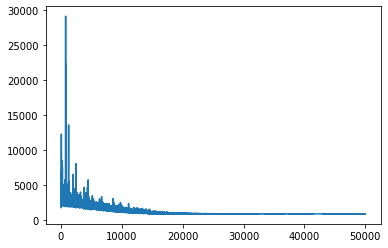

In [377]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [378]:
# samples from the posterior
posterior = approximation.sample(5000)

Evaluate MAP (Mean Absolute Error) and MAPE (Mean Absolute Percentage Error).

In [379]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  87953.70831121775
MAPE =  0.2001988074178041


## Clustering

### Full Model

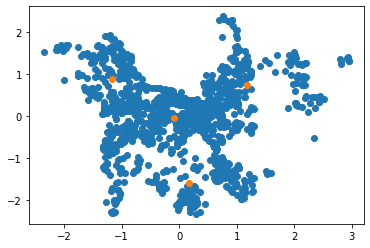

In [380]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# Choosing features 4 & 5 which relate to longitude and latitude.
ind=[4,5]

X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [381]:
np.max(ys_train)

990000

### Clusters

In [382]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))


{0: 440, 1: 172, 2: 178, 3: 142}

In [383]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 115, 1: 34, 2: 47, 3: 37}

In [384]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)


In [385]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [386]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [387]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model

In [388]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 436.57


In [389]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 236.96


In [390]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 235.96


In [391]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 229.25


In [392]:
#############

In [393]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



##Simulations

### Only Cluster 0

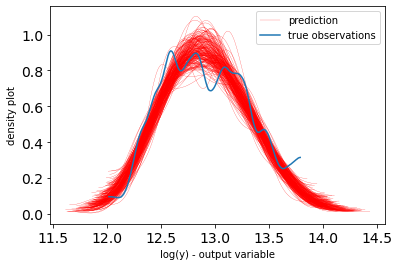

In [394]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 1

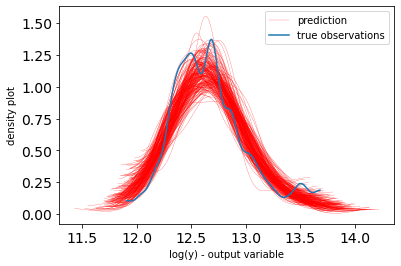

In [395]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 2

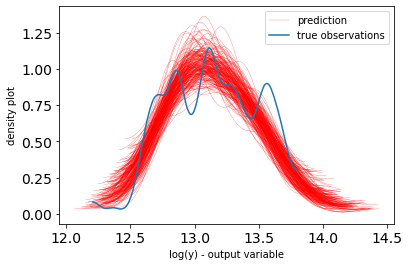

In [396]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 3

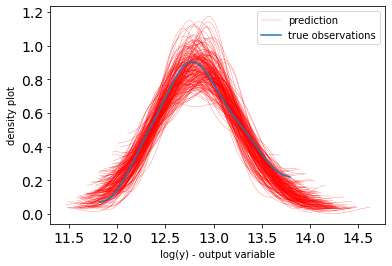

In [397]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

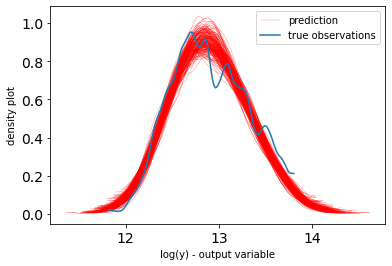

In [398]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Validation set performance

In [399]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# MAE
print("MAE=",np.mean(joint))

Size Cluster0 115 , MAE Cluster0= 73439.54850003777
Size Cluster1 34 , MAE Cluster1= 42064.63822989456
Size Cluster2 47 , MAE Cluster2= 91785.44735786204
Size Cluster3 37 , MAE Cluster3= 83244.88691841686
MAE= 74118.9811979472


### PPC on the Validation set



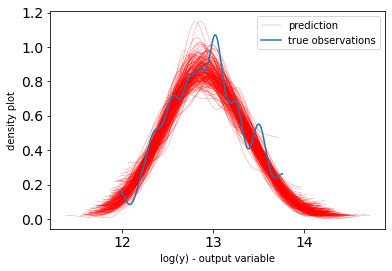

In [400]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [401]:
Ypred.shape

(200, 233)

In [402]:
Ypred

array([[12.86631765, 12.69164758, 13.27531553, ..., 11.8528202 ,
        12.7625948 , 13.15273811],
       [12.63614287, 13.03863377, 13.36653816, ..., 12.465296  ,
        13.09195577, 12.75638397],
       [12.93571269, 12.57182114, 13.52849522, ..., 12.93431518,
        12.97510828, 12.82186317],
       ...,
       [13.02222689, 12.81515286, 13.43173815, ..., 11.93494112,
        12.8314393 , 12.15585032],
       [13.16944569, 12.55921955, 13.27399947, ..., 12.30637828,
        12.78221248, 12.53662176],
       [13.1176266 , 12.4854982 , 13.45774045, ..., 12.10017216,
        12.85261206, 12.68167786]])

In [403]:
#Ypred.shape[0]

In [404]:
Ypred_row_avg = []

for each_row in range(Ypred.T.shape[0]):

  temp_total = 0

  for each_column in Ypred.T[each_row,:]:

    temp_total += each_column

  avg_value = temp_total/Ypred.shape[0]

  Ypred_row_avg.append(avg_value)

#Ypred_row_avg
len(Ypred_row_avg)

Ypred_avg_array = np.array(Ypred_row_avg)

Ypred_avg_array.shape

(233,)

In [405]:
y_test.shape

(233,)

In [406]:
#np.exp(np.log(y_test))
#y_test

In [407]:
#np.log(y_test)

In [408]:
# type(y_test)
# type(Ypred_avg_array)

**The prediction and true value are already in log form**

In [409]:
from sklearn.metrics import mean_squared_log_error

# RMSLE_PiecewiseModel = mean_squared_log_error(y_test, Ypred_avg_array, squared=False)

# RMSLE_PiecewiseModel

#######mean_squared_log_error(np.log(y_test), Ypred_avg_array, squared=False)

# from sklearn.metrics import mean_squared_error

# np.sqrt(mean_squared_error(np.log(y_test), Ypred_avg_array))

np.sqrt(mean_squared_log_error( y_test, np.exp(Ypred_avg_array) ))

0.5356252761066075

In [410]:
# type(Ypred_avg_array)
# Ypred_avg_array
# np.exp(Ypred_avg_array)
# type(y_test)
# y_test

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [411]:
# df_dataset_X_train, df_dataset_X_val, df_dataset_y_train, df_dataset_y_val = train_test_split(df_dataset_X, df_dataset_y, test_size = 0.20, random_state = 0)

In [412]:
df_dataset_X.shape

(1165, 18)

In [413]:
df_dataset_X_train.shape

(932, 18)

In [414]:
df_dataset_y.shape

(1165, 1)

In [415]:
# Gaussian Processes
# https://gpy.readthedocs.io/en/deploy/GPy.kern.html
# Radial Basis Functions
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# kernel is a function that specifies the degree of similarity 
# between variables given their relative positions in parameter space
kernel = GPy.kern.RBF(input_dim=1,lengthscale=0.15,variance=0.2)
print(kernel)

  rbf.         |  value  |  constraints  |  priors
  variance     |    0.2  |      +ve      |        
  lengthscale  |   0.15  |      +ve      |        


In [416]:
X_new_train =  df_dataset_X_train.to_numpy()
X_new_test = df_dataset_X_val.to_numpy()

y_new_train = df_dataset_y_train.to_numpy()
y_new_test = df_dataset_y_val.to_numpy()

In [417]:
X_new_train.shape

(932, 18)

In [418]:
y_new_train.shape

#type(y_new_train)

(932, 1)

**Remove dimension to suit Bayesian Neural Network code later.**

In [419]:
y_new_train = np.squeeze(y_new_train)

y_new_train.shape

(932,)

In [420]:
#np.ones(len(X_new_train[0]))

#np.ones((X_new_train.shape[0], 1))

# x1 = np.hstack([X_new_train, np.ones((X_new_train.shape[0], 1))])

# x1.shape

#x1 = np.hstack([np.ones(len(X_new_train[0])), X_new_train])

In [421]:
#x1 = np.vstack([np.ones((X_new_train.shape[0],1)), X_new_train]).T

In [422]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
###########x1 = np.vstack([np.ones(len(X_new_train)), X_new_train]).T

x1 = np.hstack([X_new_train, np.ones((X_new_train.shape[0], 1))])

floatX = theano.config.floatX

l = 15
#####l = 25

# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', y_new_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output)

**Need to adjust the 'Draw' and 'tune' parameters before drawing samples from the posterior. Otherwise, the error highlighted in the comment below will happen.**

In [423]:
# this can be slow because there are many parameters

# # some parameters
# par1 = 100  # start with 100, then use 1000+
# par2 = 1000 # start with 1000, then use 10000+

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ValueError: Mass matrix contains zeros on the diagonal. 
# The derivative of RV `w_0`.ravel()[0] is zero.
# The derivative of RV `w_0`.ravel()[1] is zero.
# The derivative of RV `w_0`.ravel()[2] is zero.
# The derivative of RV `w_0`.ravel()[4] is zero.
# The derivative of RV `w_0`.ravel()[5] is zero.
# The derivative of RV `w_0`.ravel()[6] is zero.
# .............

# some parameters
par1 = 50  # start with 100, then use 1000+
par2 = 250 # start with 1000, then use 10000+


# some parameters
par1 = 100  # start with 100, then use 1000+
par2 = 250 # start with 1000, then use 10000+


# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)
    
    # posterior = pm.sample(par1, tune=500)


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 250 tune and 100 draw iterations (250 + 100 draws total) took 1 seconds.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [424]:
######### my code

# draw samples from variational posterior
# D = 500
# posterior = approx.sample(draws=D)


x2 = np.hstack([X_new_test, np.ones((X_new_test.shape[0], 1))])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred)


Specifically, PyMC3 supports the following Variational Inference (VI) methods:

  * Automatic Differentiation Variational Inference (ADVI): 'advi'
  * ADVI full rank: 'fullrank_advi'
  * Stein Variational Gradient Descent (SVGD): 'svgd'
  * Amortized Stein Variational Gradient Descent (ASVGD): 'asvgd'
  * Normalizing Flow with default scale-loc flow (NFVI): 'nfvi'


In [425]:
# we can do instead an approximated inference
param3 = 1000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 8.2573e+11


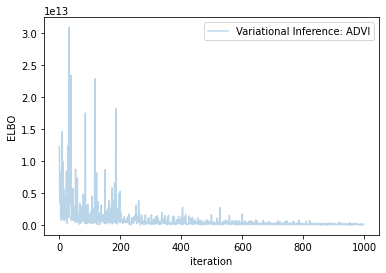

In [426]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [427]:
# draw samples from variational posterior
D = 500
posterior = approx.sample(draws=D)

Now, we compute the prediction for each sample. 
* Note that we use `np.tanh` instead of `pm.math.tanh`
for speed reason. 
* `pm.math.tanh` is slower outside a Pymc3 model because it converts all data in theano format.
* It is convenient to do GPU-based training, but it is slow when we only need to compute predictions.

In [428]:
# # add a column of ones to include an intercept in the model
# x2 = np.vstack([np.ones(len(X_new_test)), X_new_test]).T

# add a column of ones to include an intercept in the model
###########x2 = np.vstack([np.ones(len(X_new_test)), X_new_test]).T

x2 = np.hstack([X_new_test, np.ones((X_new_test.shape[0], 1))])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred)

We first plot the mean  of `y_pred`, this is very similar to the prediction that Keras returns

In [429]:
y_pred.shape

(500, 233)

In [430]:
y_pred

array([[22.36221552, 22.47868632, 24.06683862, ..., 24.06683862,
        24.06683862, 22.47868632],
       [24.50871651, 24.50871651, 25.57177431, ..., 26.11048884,
        26.11048884, 24.50871651],
       [25.23864711, 25.5048315 , 25.50483149, ..., 25.5048315 ,
        25.5048315 , 25.5048315 ],
       ...,
       [29.11888991, 29.11888991, 29.12131904, ..., 29.53876884,
        29.70336301, 29.11888991],
       [27.18271464, 27.18271464, 27.18271464, ..., 27.18271464,
        27.18271464, 27.18271464],
       [24.31606557, 19.77298161, 17.88382004, ..., 24.90952836,
        24.90952836, 20.36585903]])

In [431]:
y_pred.max()

35.832939642720866

In [432]:
y_new_test.shape

(233, 1)

In [433]:
y_new_test[0:10]

array([[745000],
       [199000],
       [650000],
       [440000],
       [375000],
       [290000],
       [410000],
       [380000],
       [275000],
       [475000]])

In [434]:
y_pred.shape[0]

500

In [435]:
Ypred_row_avg = []

for each_row in range(y_pred.T.shape[0]):

  temp_total = 0

  for each_column in y_pred.T[each_row,:]:

    temp_total += each_column

  avg_value = temp_total/y_pred.shape[0]

  Ypred_row_avg.append(avg_value)

#Ypred_row_avg
len(Ypred_row_avg)

Ypred_avg_array = np.array(Ypred_row_avg)

Ypred_avg_array.shape

(233,)

In [436]:
#np.exp(Ypred_avg_array)

In [437]:
np.sqrt(mean_squared_log_error( y_new_test, np.exp(Ypred_avg_array)))

14.080555201633482

# **SUMMARY**

## Pre-Processing

*	The attributes/features ‘Index’ and ‘ID’ both have 1638 unique values (same size of training set) so don’t offer any useful information. These features can be dropped (except when wanting to use ‘Index’ as part of a Kaggle competition submission).

*	The attribute 'Services' can be seen to have 1061 out of 1638 samples with a NaN/Null result. That accounts for nearly 65% of all data for that column. This attribute/feature will be dropped.

*	The attribute 'BER_class' has 251 instances of NaN/Null values but there are a variety of values it can take on so it will be maintained and instead the NaN/Null instances will be removed.

*	Drop all rows with NaN present as the sample/observation is incomplete and may be misleading.

*	Remove samples where there are 0 bathrooms and 0 bedrooms if there are any.

*	For the categorical features 'Location', 'BER_class' and 'Type' a mapping approach will be taken to convert these to numerical features going forward.

  * The approach shown below was adapted from datacamp.com by Pathak (2020) which displays a very helpful way of mapping categorical features to numerical features without having to explicitly state the mapping yourself.

*	Combine attributes 'Description' and 'Features' so the NLP actions/steps will apply to both. Drop those old features and just retain the combined new attribute 'Information'.

*	Cycle through each numerical feature in the training data set and remove data points that are deemed outliers i.e. data points that fall outside the IQR (Interquartile Range). I adapted code by Brownlee (2018) to help assess outliers in the data.

*	Similar pre-processing was done to the test set like what was mentioned above. 
o	This caused an issue when subsequently trying to submit to the Kaggle competition as it was expecting 702 rows in the submitted file – the removal of NaN/Null instances and the removal of outliers had to be ignored for the test set if trying to make a submission.

*	1165 rows were otherwise present in the training data with 10 features. 528 rows were present in the test data with 10 features.


## Natural Language Processing

*	The created feature ‘Information’ (combination of ‘Description’ and ‘Features’) was used so that any applied NLP steps would take affect collectively.

*	I followed the approaches taken in the Spam Classifier 2 example notebook.

*	The ‘Information’ feature was cleaned such that:

  *	Everything except letters was removed.

  *	Short words (4 or less letters) were removed.

  *	All text was made lower case.

*	The NLTK library was used to help remove ‘stop words’ as part of the tokenization process.

*	Sklearn’s ‘TfidfVectorizer’ was used to help assess word count/frequency. It helps to retain the desired number of counts relating to the most commonly occurring words. Those retained words become the ‘vocabulary’.

  *	10 vector count features were retained. I was seeing a major improvement in performance by keeping many more features.

*	The new word count features can then be used in place of the text feature ‘Information’.

*	Sklearn’s train_test_split was used to divide up the training data into a train and validation set.

*	Sklearn’s MLPRegressor was used to help make an assessment of out of sample performance using the validation set – only the new word/vector count features were used in this prediction.

*	As RMSLE (Root Mean Squared Log Error) is the metric of choice for the Kaggle competition, I used sklearn’s ‘mean_squared_log_error’ to help assess this along with Numpy’s ‘np.sqrt’.

  *	A RMSLE of about 0.3829 was seen on the validation set.

*	The same cleaning was done to the ‘Information’ feature on the test set and a prediction was also done on the word/vector count features using the same vocabulary as in the training data.

*	The word/vector count features are subsequently retained for the Piecewise Regression and Bayesian Neural Network sections.


## Piecewise Regression

*	I split the training data into a train and validation set to try assess out of sample performance.

*	I stuck quite closely to my approach from Etivity 2 for this modelling approach. However, one main difference here is that the new word features from the NLP work are used here too instead of any text features.

*	A full model is initially created with the training and validation data  undergoing scaling by the use of ‘standardscaler’.

  *	Samples taken from the posterior enable initial MAP (Mean Absolute Error) and MAPE (Mean Absolute Percentage Error) results as follows:

  *	MAE =  87980.1421

  *	MAPE =  0.1997

*	From using ‘GaussianMixture from sklearn, 4 clusters are assigned and piecewise model applied.

  *	From the simulations done, the predictions relatively align with the true observations for each cluster.

  *	Size Cluster0 115 , MAE Cluster0= 73439.30940758307

  *	Size Cluster1 37 , MAE Cluster1= 82100.66439037886

  *	Size Cluster2 34 , MAE Cluster2= 41979.635315108295

  *	Size Cluster3 47 , MAE Cluster3= 92039.8092456513

  *	MAE= 73976.06780933634

*	The Posterior predictive checks (PPCs) on the validation set show alignment with the prediction and true observations as well.

*	The RMSLE (Root Mean Squared Log Error) observed for the validation set was 0.5406.


## Bayesian Neural Network

*	Here I also split the training data into a train and validation set to try assess out of sample performance.

*	The same train test split from the Piecewise Regression model is used here too. 

*	I tried to follow the Bayesian Neural Network lab file closely but ran into a number of issues trying to get my code to run and a lot of debug was required.

*	A Bayesian Neural Network is ran (‘neural_network’). When trying to subsequently sample from the posterior, I ran into problems like “# ValueError: Mass matrix contains zeros on the diagonal.  The derivative of RV `w_0`.ravel()[0] is zero.” Etc.

  *	In the end from debug I found I had to reduce the number provided to the ‘Draws’ parameter to e.g. 100 and reduce the ‘tune’ parameter to 250 to get it to sample.

*	I included the code to do an approximated inference too use the VI method but the loss was quite high.

*	When trying to calculate the RMSLE (Root Mean Squared Log Error) here, the value was quite poor e.g. 12 but there is likely something in my code setup that is incorrect. This would require further review.


# **REFERENCES**




* Ahtesham, M., Bawany, N. Z. and Fatima, K. (2020) 'House Price Prediction using Machine Learning Algorithm - The Case of Karachi City, Pakistan', *2020 21st International Arab Conference on Information Technology (ACIT)*, 1-5, available: https://doi.org/10.1109/ACIT50332.2020.9300074.

* Brownlee, J. (2018) *How to Remove Outliers for Machine Learning*, machinelearningmastery.com, available: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ [accessed 17 Oct 2021].

* Brownlee, J. (2019) *A Gentle Introduction to Sparse Matrices for Machine Learning*, machinelearningmastery.com, available: https://machinelearningmastery.com/sparse-matrices-for-machine-learning/ [accessed 17 Oct 2021].

* *Inference* (2018) docs.pymc.io, available: https://docs.pymc.io/en/stable/api/inference.html [accessed 19 Oct 2021].

* Pathak, M. (2020) *Handling Categorical Data in Python*, datacamp.com, available: https://www.datacamp.com/community/tutorials/categorical-data#encoding [accessed 17 Oct 2021].

* *questions-and-answers/60012* (2018) kaggle.com, available: https://www.kaggle.com/questions-and-answers/60012 [accessed 17 Oct 2021].

* *sklearn.metrics.mean_squared_log_error* (2021) scikit-learn.org, available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html [accessed 17 Oct 2021].

* *sklearn.neural_network.MLPRegressor* (2021) scikit-learn.org, available: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor [accessed 17 Oct 2021].

* *Text feature extraction* (2021) scikit-learn.org, available: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction [accessed 17 Oct 2021].

* *Variational Inference: Bayesian Neural Networks* (2017) docs.pymc.io, available: https://docs.pymc.io/en/stable/pymc-examples/examples/variational_inference/bayesian_neural_network_advi.html [accessed 19 Oct 2021].




### **Exporting file to ".pdf" from Google Colab.**

The code below is only uncommented when I want to export.

In [438]:
# ### https://stackoverflow.com/questions/52588552/google-co-laboratory-notebook-pdf-download

# %%capture
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('ET5003_KaggleCompetition_MichaelMcKegney_20149743.ipynb')